# Projeto 2 - CDados

### Autores: Diego Guimarães Nuñez, Felipe Bakowski Nantes de Souza, Gustavo de Lima Mota

### Tema: Conseguimos prever o número de homicídios totais das cidades que não são capital por ano, no estado de São Paulo?

### Features: IDH por município, Proporção de crianças (6-14 anos) fora da escola, Proporção de vulnerabilidade socioeconêmica, Proporção de pessoas sem água e esgoto, e Índice de Gini por município.

In [298]:
import basedosdados as bd
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

### Baixando as bases de dados utilizadas no projeto:

In [243]:
homicidio = bd.read_table(dataset_id='br_sp_gov_ssp',
table_id='ocorrencias_registradas',
billing_project_id="cdadosp2-404421")

Downloading: 100%|██████████| 153876/153876 [00:32<00:00, 4745.20rows/s]


In [244]:
homicidio

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2002,1,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,21,0
1,2002,2,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,32,0
2,2002,3,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,36,0
3,2002,4,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,45,0
4,2002,5,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153871,2020,8,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
153872,2020,9,3500105,Presidente Prudente,0,0,0,0,0,0,...,2,1,1,0,0,0,0,0,12,1
153873,2020,10,3500105,Presidente Prudente,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,12,0
153874,2020,11,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,16,0


In [245]:
ivs = bd.read_table(dataset_id='br_ipea_avs',
table_id='municipio',
billing_project_id="cdadosp2-404421")

Downloading: 100%|██████████| 319681/319681 [06:34<00:00, 810.59rows/s] 


In [246]:
ivs # colunas que serão usadas para feature: "ivs", "ivs_infraestrutura_urbana", "ivs_capital_humano" e "ivs_renda_trabalho"
# índice de vulnerabilidade social.

,ano,sigla_uf,id_municipio,raca_cor,sexo,localizacao,ivs,ivs_infraestrutura_urbana,ivs_capital_humano,ivs_renda_trabalho,...,populacao_15_mais,populacao_15_17,populacao_15_24,populacao_16_18,populacao_18_mais,populacao_18_20,populacao_18_24,populacao_19_21,populacao_25_mais,populacao_65_mais
0,2000,AC,1200013,branco,total,total,0.652,0.631,0.778,0.546,...,1135,111,314,92,1024,66,203,69,821,55
1,2000,AC,1200104,branco,total,total,0.538,0.412,0.727,0.473,...,2506,291,812,239,2215,196,521,200,1694,179
2,2000,AC,1200203,branco,total,total,0.620,0.613,0.720,0.527,...,13485,1619,5350,1963,11867,1875,3731,1641,8136,857
3,2000,AC,1200252,branco,total,total,0.594,0.596,0.631,0.556,...,1560,170,488,160,1389,129,318,109,1072,98
4,2000,AC,1200302,branco,total,total,0.799,0.795,0.897,0.704,...,6553,937,2573,833,5616,859,1637,817,3980,326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319676,2010,MG,3150539,branco,mulher,rural,NaN,NaN,NaN,NaN,...,10,0,0,0,10,0,0,0,10,0
319677,2010,MG,3165537,branco,mulher,rural,NaN,NaN,NaN,NaN,...,21,0,0,0,21,0,0,0,21,0
319678,2010,MG,3168705,total,mulher,rural,NaN,NaN,NaN,NaN,...,38,0,0,0,38,0,0,0,38,0
319679,2010,MG,3115508,negro,mulher,rural,NaN,NaN,NaN,NaN,...,77,0,14,0,77,0,14,0,63,0


In [247]:
ivs.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'raca_cor', 'sexo', 'localizacao',
       'ivs', 'ivs_infraestrutura_urbana', 'ivs_capital_humano',
       'ivs_renda_trabalho', 'idhm', 'idhm_l', 'idhm_e', 'idhm_r',
       'idhm_subescolaridade', 'idhm_subfrequencia', 'prosperidade_social',
       'proporcao_vulnerabilidade_socioeconomica', 'propocao_energia_eletrica',
       'proporcao_domicilio_densidade', 'proporcao_sem_agua_esgoto',
       'proporcao_sem_coleta', 'renda_per_capita', 'renda_media_18_mais',
       'proporcao_sem_renda_18_mais', 'renda_trabalho',
       'renda_per_capita_vulneravel', 'proporcao_vulneravel',
       'populacao_vulneravel_15_24', 'proporcao_vulneravel_dependente_idoso',
       'populacao_vulneravel_e_idoso', 'razao_dependencia',
       'fecundidade_total', 'taxa_envelhecimento', 'mortalidade_1_menos',
       'proporcao_mortalidade_5_menos', 'proporcao_crianca_fora_escola_0_5',
       'proporcao_escola_5_6', 'proporcao_crianca_fora_escola_6_14',
       'proporca

## Refletindo sobre os problemas sociais presentes em São Paulo, um dos mais notáveis é a abundante taxa de criminalidade, especificando ainda mais, a taxa de homicídio. Visado a target (problema o qual é pretendido visualizar), foi-se pensado em possíveis targets quais estão ligadas com o tema tido em vista, que são: Índice de Gini, Indice de desenvolvimento Humano, Proporcao de populacao sem esgoto, Proporcao de crianças que sairam da escola entre 6 a 14 anos e Proporcao de Vulnerabilidade Socioeconomica.
## Tendo em vista a target com suas respectivas features, é pretendido realizar a criação de um modelo com capacidade de previsão para a criminalidade, entendendo intrinsicamente as relações individuais de cada feature com a target. A partir da criação do modelo, é facilitada a visão das 'raízes' do problema, possibilitando possíveis tomadas de decisões pessoais e governamentais para tratar esse severo problema.

#### Primeiramente, vamos tratar a base de dados de homicidios e deixá-la mais visualizável

In [248]:
homicidio['Homicidio_total'] = homicidio.loc[:, ['homicidio_doloso', 'homicidio_culposo_outros']].sum(axis=1) #homicidio total
homicidio_2010 = homicidio.loc[(homicidio['ano'] == 2010)]
homicidio_filtrado = homicidio_2010.loc[:,('ano','id_municipio', 'regiao_ssp', 'Homicidio_total')] #selecionando colunas

In [301]:
homicidio_ano = homicidio_filtrado.groupby(['ano', 'id_municipio', 'regiao_ssp']).agg({'Homicidio_total': 'sum'}).reset_index()
homicidio_ano

,ano,id_municipio,regiao_ssp,Homicidio_total
0,2010,3500105,Presidente Prudente,1.0
1,2010,3500204,São José do Rio Preto,1.0
2,2010,3500303,Piracicaba,1.0
3,2010,3500402,Piracicaba,2.0
4,2010,3500501,Campinas,0.0
...,...,...,...,...
635,2010,3557006,Sorocaba,6.0
636,2010,3557105,São José do Rio Preto,12.0
637,2010,3557154,São José do Rio Preto,0.0
638,2010,3557204,Bauru,1.0


 ## Agora devemos tratar a base IVS, para que, consigamos utilizar as colunas:  Prop_crianca_fora_escola_6_14, IDHM (IDH por municipio), Proporção_vulnerabilidade_socioeconomica (proporção de pessoas com renda per capita inferior a meio salario mínimo e que gastam mais de uma hora até chegar no trabalho), proporção_sem_agua_esgoto, Índice de Gini

In [250]:
ivs_filtrado = ivs.loc[:,('ano','id_municipio','sigla_uf','idhm','proporcao_crianca_fora_escola_6_14','proporcao_vulnerabilidade_socioeconomica', 'proporcao_sem_agua_esgoto','indice_gini')]
ivs_t = ivs_filtrado.loc[(ivs['sigla_uf'] == 'SP') & (ivs['ano'] == 2010)]

In [251]:
ivs_novo = ivs_t.dropna()
ivs_novo2 = ivs_novo.drop_duplicates(subset='id_municipio', keep = 'first')
ivs_novo2

,ano,id_municipio,sigla_uf,idhm,proporcao_crianca_fora_escola_6_14,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini
202185,2010,3500105,SP,0.819,1.81,2.38,0.00,0.52
202186,2010,3500204,SP,0.735,1.51,5.45,0.00,0.39
202187,2010,3500303,SP,0.742,3.70,9.76,0.49,0.51
202188,2010,3500709,SP,0.774,2.94,14.06,0.00,0.41
202189,2010,3500758,SP,0.736,0.60,2.68,0.61,0.44
...,...,...,...,...,...,...,...,...
202825,2010,3554805,SP,0.799,1.32,7.63,0.83,0.53
202826,2010,3555406,SP,0.781,2.64,3.00,1.50,0.62
203604,2010,3504701,SP,0.669,1.09,8.62,0.00,0.38
203630,2010,3507209,SP,0.745,5.35,13.75,7.19,0.40


In [252]:
tabela_final = pd.merge(ivs_novo2, homicidio_ano[['id_municipio', 'Homicidio_total']], on='id_municipio', how='left')
tabela_definitiva = tabela_final.dropna()
tabela_definitiva

,ano,id_municipio,sigla_uf,idhm,proporcao_crianca_fora_escola_6_14,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini,Homicidio_total
0,2010,3500105,SP,0.819,1.81,2.38,0.00,0.52,1.0
1,2010,3500204,SP,0.735,1.51,5.45,0.00,0.39,1.0
2,2010,3500303,SP,0.742,3.70,9.76,0.49,0.51,1.0
3,2010,3500709,SP,0.774,2.94,14.06,0.00,0.41,3.0
4,2010,3500758,SP,0.736,0.60,2.68,0.61,0.44,0.0
...,...,...,...,...,...,...,...,...,...
640,2010,3554805,SP,0.799,1.32,7.63,0.83,0.53,7.0
641,2010,3555406,SP,0.781,2.64,3.00,1.50,0.62,21.0
642,2010,3504701,SP,0.669,1.09,8.62,0.00,0.38,1.0
643,2010,3507209,SP,0.745,5.35,13.75,7.19,0.40,0.0


In [253]:
tabela_definitiva.loc[tabela_definitiva['Homicidio_total']==1260] # identificando São Paulo

,ano,id_municipio,sigla_uf,idhm,proporcao_crianca_fora_escola_6_14,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini,Homicidio_total
600,2010,3550308,SP,0.856,3.61,38.37,0.27,0.62,1260.0


In [254]:
tabela_sem_sp = tabela_definitiva.drop(tabela_definitiva.loc[tabela_definitiva['Homicidio_total']==1260].index) # tirando São Paulo

In [255]:
tabela_sem_sp.describe()

,ano,idhm,proporcao_crianca_fora_escola_6_14,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini,Homicidio_total
count,639.0,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,2010.0,0.763746,1.910110,7.611956,0.636635,0.456135,5.244131
std,0.0,0.034519,1.370195,7.666484,1.221914,0.059192,13.881830
min,2010.0,0.655000,0.000000,0.000000,0.000000,0.320000,0.000000
25%,2010.0,0.742000,1.055000,2.365000,0.000000,0.410000,0.000000
50%,2010.0,0.763000,1.760000,5.780000,0.130000,0.450000,1.000000
75%,2010.0,0.785000,2.490000,10.085000,0.675000,0.490000,4.000000
max,2010.0,0.891000,11.840000,51.300000,10.170000,0.740000,168.000000


## Tabela definitiva criada!



## Entendendo como a target (homicídio) se comporta no tempo

## De início, tem-se um crosstab da porcentagem de homicícios em cada ano e um gráfico de barras do homicídio em função do tempo. Este será utilizado para a validação do modelo no futuro

In [256]:
pd.crosstab(homicidio.ano, homicidio.Homicidio_total, normalize=True, margins=True).round(4)

Homicidio_total,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,391.0,392.0,396.0,405.0,410.0,413.0,421.0,453.0,480.0,All
ano,,,,,,,,,,,,,,,,,,,,,
2002,0.0388,0.0054,0.0017,0.0009,0.0005,0.0004,0.0003,0.0002,0.0002,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0501
2003,0.0387,0.0051,0.0017,0.0010,0.0007,0.0005,0.0003,0.0003,0.0002,0.0002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0499
2004,0.0387,0.0057,0.0019,0.0010,0.0006,0.0004,0.0003,0.0003,0.0002,0.0002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0501
2005,0.0389,0.0058,0.0019,0.0010,0.0007,0.0005,0.0003,0.0002,0.0002,0.0002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0502
2006,0.0392,0.0058,0.0020,0.0010,0.0005,0.0004,0.0003,0.0002,0.0001,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0500
2007,0.0399,0.0057,0.0017,0.0008,0.0006,0.0003,0.0002,0.0001,0.0001,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0498
2008,0.0405,0.0055,0.0017,0.0008,0.0004,0.0003,0.0002,0.0001,0.0001,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0501
2009,0.0395,0.0058,0.0018,0.0009,0.0006,0.0003,0.0002,0.0001,0.0001,0.0001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0498
2010,0.0396,0.0061,0.0018,0.0008,0.0005,0.0004,0.0002,0.0002,0.0001,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0499


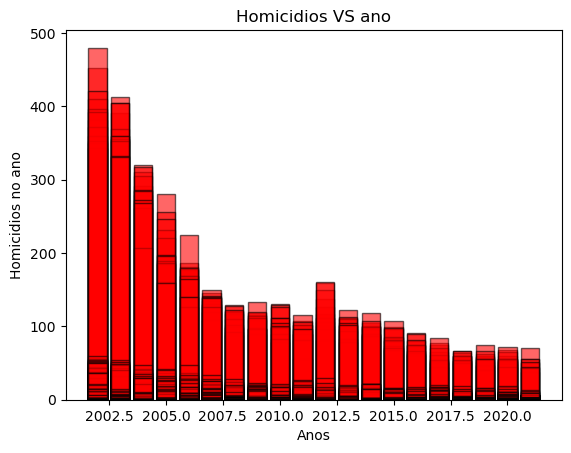

In [257]:
plt.bar(homicidio.ano, homicidio.Homicidio_total, edgecolor='black', color='red', alpha=0.6)
plt.xlabel('Anos')
plt.ylabel('Homicidios no ano')
plt.title('Homicidios VS ano')
plt.show()

 ## Então, deve-se entender as correlações entre as features e variáveis, para que seja possível diagnosticar futuros erros

Text(0.5, 1.0, 'Correlações')

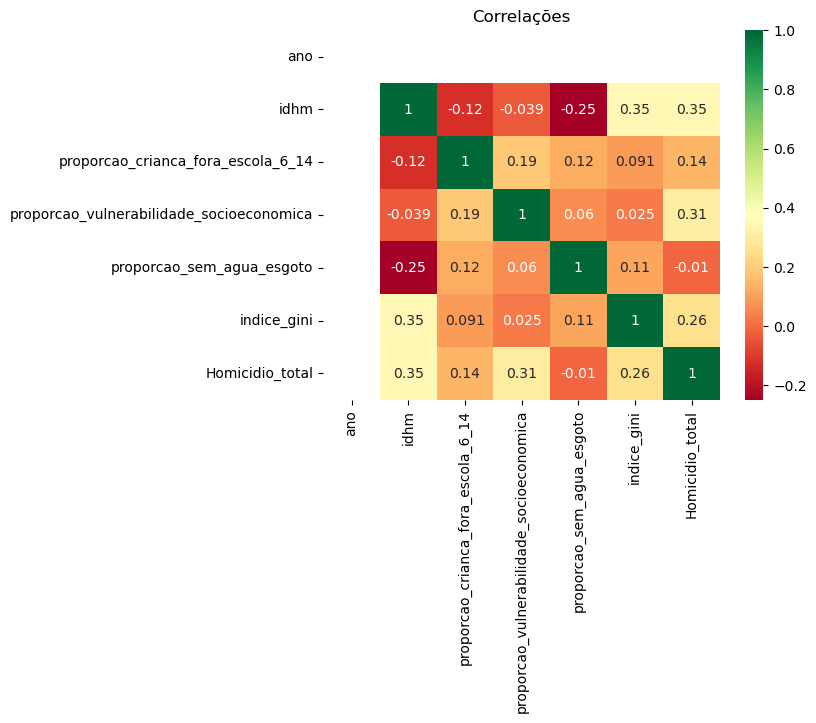

In [327]:
sns.heatmap(tabela_sem_sp.corr(), annot = True, cmap= "RdYlGn")
plt.title('Correlações')

# Por fim, plota-se os gráficos de dispersão + .corr

Correlação entre homicídios e idhm é moderada e possui valor de 0.34710784904414727
Correlação entre homicídios e prop. de crianças fora da escola é fraca e possui valor de 0.14312836258383912
Correlação entre homicídios e prop. de pessoas vulneráveis é moderada e possui valor de 0.3055148426790926
Correlação entre homicídios e prop. de pessoas sem esgoto é fraca e possui valor de -0.010025408501639741
Correlação entre homicídios e indice gini é fraca e possui valor de 0.2563769185726429


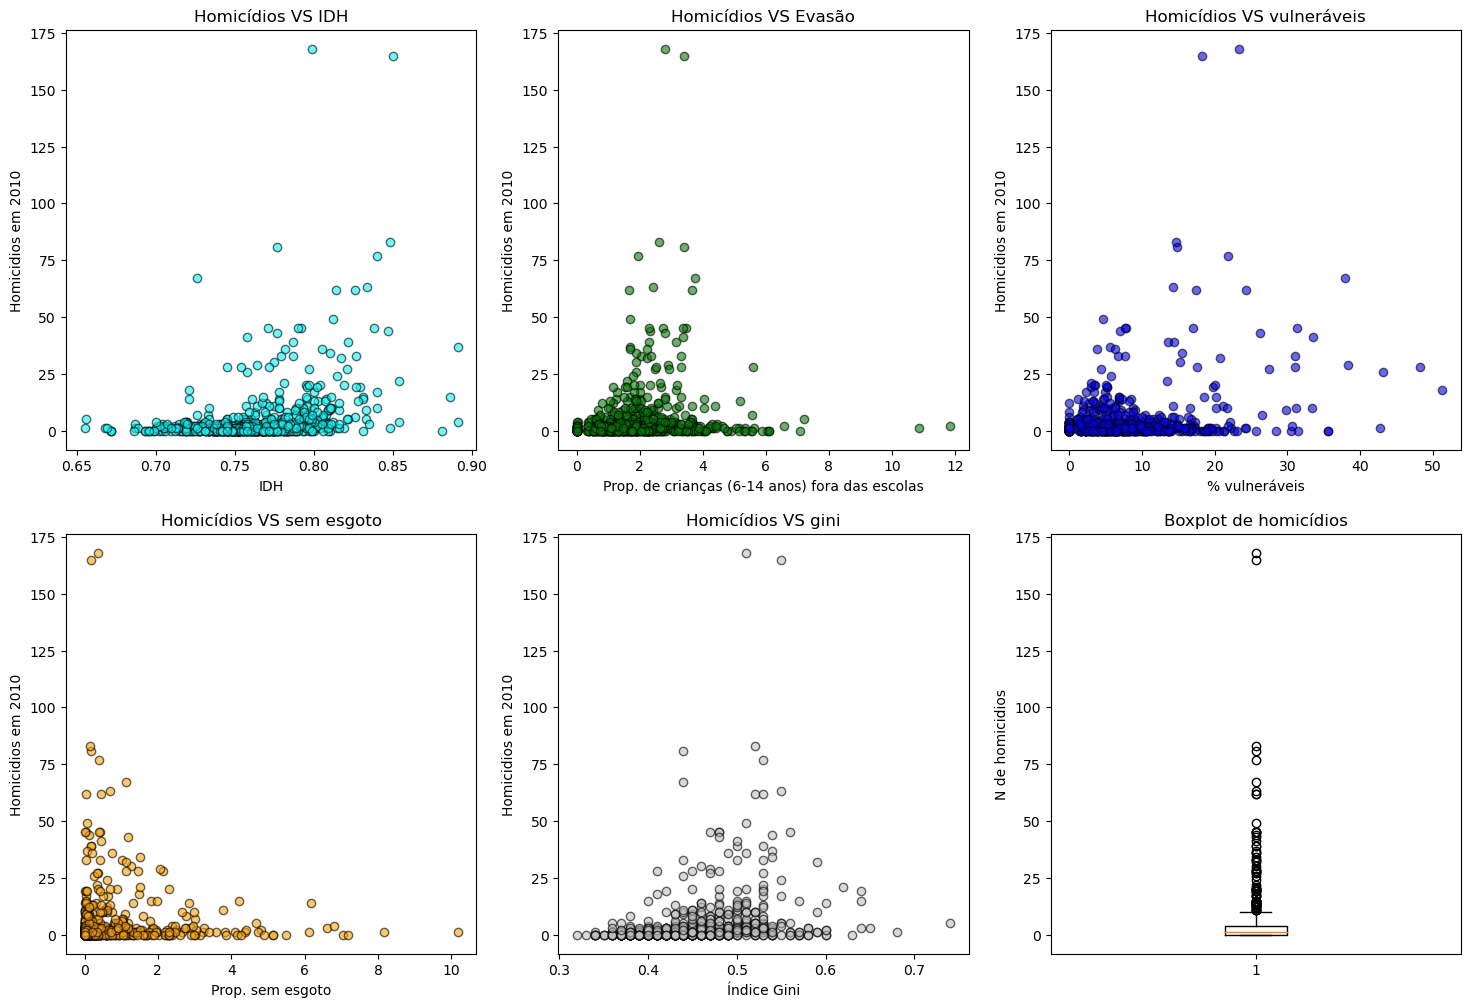

In [326]:
plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
plt.scatter(tabela_sem_sp['idhm'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='cyan', edgecolors="black")
plt.xlabel('IDH')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS IDH')
corr_idhm = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['idhm'])
if abs(corr_idhm) < 0.3:
    print(f'Correlação entre homicídios e idhm é fraca e possui valor de {corr_idhm}')
elif abs(corr_idhm) >0.3 and (corr_idhm) < 0.7:
    print(f'Correlação entre homicídios e idhm é moderada e possui valor de {corr_idhm}')
elif abs(corr_idhm) > 0.7:
    print(f'Correlação entre homicídios e idhm é forte e possui valor de {corr_idhm}')

plt.subplot(2,3,2)
plt.scatter(tabela_sem_sp['proporcao_crianca_fora_escola_6_14'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='green', edgecolors="black")
plt.xlabel('Prop. de crianças (6-14 anos) fora das escolas')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS Evasão')
corr_crianca = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['proporcao_crianca_fora_escola_6_14'])
if abs(corr_crianca) < 0.3:
    print(f'Correlação entre homicídios e prop. de crianças fora da escola é fraca e possui valor de {corr_crianca}')
elif abs(corr_crianca) >0.3 and (corr_crianca) < 0.7:
    print(f'Correlação entre homicídios e prop. de crianças fora da escola é moderada e possui valor de {corr_crianca}')
elif abs(corr_crianca) > 0.7:
    print(f'Correlação entre homicídios e prop. de crianças fora da escola é forte e possui valor de {corr_crianca}')

plt.subplot(2,3,3)
plt.scatter(tabela_sem_sp['proporcao_vulnerabilidade_socioeconomica'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='blue', edgecolors="black")
plt.xlabel('% vulneráveis')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS vulneráveis')
corr_vul = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['proporcao_vulnerabilidade_socioeconomica'])
if abs(corr_vul) < 0.3:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é fraca e possui valor de {corr_vul}')
elif abs(corr_vul) >0.3 and (corr_vul) < 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é moderada e possui valor de {corr_vul}')
elif abs(corr_vul) > 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é forte e possui valor de {corr_vul}')

plt.subplot(2,3,4)
plt.scatter(tabela_sem_sp['proporcao_sem_agua_esgoto'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='Orange', edgecolors="black")
plt.xlabel('Prop. sem esgoto')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS sem esgoto')
corr_esg = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['proporcao_sem_agua_esgoto'])
if abs(corr_esg) < 0.3:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é fraca e possui valor de {corr_esg}')
elif abs(corr_esg) >0.3 and (corr_esg) < 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é moderada e possui valor de {corr_esg}')
elif abs(corr_esg) > 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é forte e possui valor de {corr_esg}')

plt.subplot(2,3,5)
plt.scatter(tabela_sem_sp['indice_gini'], tabela_sem_sp['Homicidio_total'], alpha=0.6, color='silver', edgecolors="black")
plt.xlabel('Índice Gini')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS gini')
corr_gini = tabela_sem_sp['Homicidio_total'].corr(tabela_sem_sp['indice_gini'])
if abs(corr_gini) < 0.3:
    print(f'Correlação entre homicídios e indice gini é fraca e possui valor de {corr_gini}')
elif abs(corr_gini) >0.3 and (corr_gini) < 0.7:
    print(f'Correlação entre homicídios e indice gini é moderada e possui valor de {corr_gini}')
elif abs(corr_gini) > 0.7:
    print(f'Correlação entre homicídios e indice gini é forte e possui valor de {corr_gini}')

plt.subplot(2,3,6)
plt.boxplot(tabela_sem_sp['Homicidio_total'])
plt.title('Boxplot de homicídios')
plt.ylabel('N de homicidios')

plt.show()

## Possíveis fontes de erro!

### Ao analisarmos a função .agg observamos que ela fazia com que existisse alguns pontos aberrantes, por exemplo, em sp tinhamos 1260 homicídios. Logo, tiramos esse ponto aberrante e trabalharemos com essa possibilidade de erro para as próximas análises

## Agora iremos criar um modelo de regressão linear com múltiplas variáveis

In [259]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [260]:
X = tabela_sem_sp[['idhm', 'proporcao_crianca_fora_escola_6_14', 'proporcao_vulnerabilidade_socioeconomica', 'proporcao_sem_agua_esgoto', 'indice_gini']]

Y = tabela_sem_sp['Homicidio_total']

In [261]:
modelo_regress = regress(Y, X)

modelo_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Homicidio_total   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     42.86
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.60e-38
Time:                        21:49:50   Log-Likelihood:                -2494.0
No. Observations:                 639   AIC:                             5000.
Df Residuals:                     633   BIC:                             5027.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     -117.9046     11.151    -10.573      0.000    -139.803     -96.006
idhm                                       136.4831     15.666      8.712      0.000     105.720     167.247
proporcao_crianca_fora_escola_6_14           1.1634      0.362      3.218      0.001       0.453       1.873
proporcao_vulnerabilidade_socioeconomica     0.5283      0.063      8.326      0.000       0.404       0.653
proporcao_sem_agua_esgoto                    0.3406      0.414      0.823      0.411      -0.472       1.153
indice_gini                                 27.2945      8.886      3.072      0.002       9.845      44.744
==============================================================================
Omnibus:                      811.530   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118000.750
Skew:                           6.305   Prob(JB):                         0.00
Kurtosis:                      68.368   Cond. No.                         442.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Então, precisamos analisar quais variáveis serão desejáveis para a análise. Para isso iremos utilizar um processo iterativo de rodar o modelo e avaliar se o valor P está acima de 10% (índice de significância), caso esteja, ele deverá ser retirado e rodaremos o modelo denovo até que achemos todas as variáveis relevantes.

In [262]:
X = tabela_sem_sp[['idhm', 'proporcao_crianca_fora_escola_6_14', 'proporcao_vulnerabilidade_socioeconomica', 'indice_gini']] #retirando prop_agua_sem_esgoto

Y = tabela_sem_sp['Homicidio_total']

In [263]:
modelo_regress = regress(Y, X)

modelo_regress.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Homicidio_total   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     53.43
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           8.21e-39
Time:                        21:49:50   Log-Likelihood:                -2494.3
No. Observations:                 639   AIC:                             4999.
Df Residuals:                     634   BIC:                             5021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     -115.5164     10.764    -10.731      0.000    -136.654     -94.378
idhm                                       132.6817     14.966      8.866      0.000     103.294     162.070
proporcao_crianca_fora_escola_6_14           1.1813      0.361      3.274      0.001       0.473       1.890
proporcao_vulnerabilidade_socioeconomica     0.5300      0.063      8.359      0.000       0.405       0.654
indice_gini                                 28.7958      8.694      3.312      0.001      11.723      45.869
==============================================================================
Omnibus:                      810.218   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117139.653
Skew:                           6.288   Prob(JB):                         0.00
Kurtosis:                      68.126   Cond. No.                         422.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Agora que apenas as features relevantes sobraram, devemos análisar a correlação entre os erros do modelo. Para isso, utilizaremos o valor de Durbin-Watson.

## No caso, esse valor é de 1,865

In [264]:
resultado = 2*(1-1.865)

In [265]:
resultado

-1.73

## Como esse resultado está muito próximo de 2, pode-se afirmar que a correlação entre os erros é bem baixa !

## TESTANDO !!!

In [288]:
import basedosdados as bd

# Para carregar o dado direto no pandas
ibge = bd.read_table(dataset_id='br_ibge_populacao',
table_id='municipio',
billing_project_id="cdadosp2-404421")

Downloading: 100%|██████████| 174388/174388 [00:09<00:00, 18602.19rows/s]


In [266]:
ibge_2010_sp = ibge.loc[(ibge['ano']==2010) & (ibge['sigla_uf']=='SP')]
ibge_2010_sp = ibge_2010_sp.dropna()

In [267]:
ibge_2010_sp

,ano,sigla_uf,id_municipio,populacao
102279,2010,SP,3500105,33797
102311,2010,SP,3500204,3557
102343,2010,SP,3500303,32148
102375,2010,SP,3500402,7584
102407,2010,SP,3500501,17266
...,...,...,...,...
122608,2010,SP,3557006,108809
122640,2010,SP,3557105,84692
122671,2010,SP,3557154,2335
122703,2010,SP,3557204,12114


In [277]:
ivs_filtrado_t = ivs.loc[:,('ano','id_municipio','sigla_uf','idhm','renda_per_capita','proporcao_vulnerabilidade_socioeconomica', 'proporcao_sem_agua_esgoto','indice_gini')]
ivs_t_t = ivs_filtrado_t.loc[(ivs['sigla_uf'] == 'SP') & (ivs['ano'] == 2010)]

In [278]:
ivs_novo_t = ivs_t_t.dropna()
ivs_novo2_t = ivs_novo_t.drop_duplicates(subset='id_municipio', keep = 'first')
ivs_novo2_t

,ano,id_municipio,sigla_uf,idhm,renda_per_capita,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini
202185,2010,3500105,SP,0.819,1083.87,2.38,0.00,0.52
202186,2010,3500204,SP,0.735,673.31,5.45,0.00,0.39
202187,2010,3500303,SP,0.742,771.00,9.76,0.49,0.51
202188,2010,3500709,SP,0.774,743.10,14.06,0.00,0.41
202189,2010,3500758,SP,0.736,610.99,2.68,0.61,0.44
...,...,...,...,...,...,...,...,...
202825,2010,3554805,SP,0.799,1070.99,7.63,0.83,0.53
202826,2010,3555406,SP,0.781,1016.25,3.00,1.50,0.62
203604,2010,3504701,SP,0.669,586.02,8.62,0.00,0.38
203630,2010,3507209,SP,0.745,670.27,13.75,7.19,0.40


In [291]:
tabela_final_t = pd.merge(ivs_novo2_t, homicidio_ano[['id_municipio', 'Homicidio_total']], on='id_municipio', how='left')
tabela_definitiva_t = tabela_final_t.dropna()

In [320]:
tabela_definitiva_t

,ano,id_municipio,sigla_uf,idhm,renda_per_capita,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini,Homicidio_total
0,2010,3500105,SP,0.819,1083.87,2.38,0.00,0.52,1.0
1,2010,3500204,SP,0.735,673.31,5.45,0.00,0.39,1.0
2,2010,3500303,SP,0.742,771.00,9.76,0.49,0.51,1.0
3,2010,3500709,SP,0.774,743.10,14.06,0.00,0.41,3.0
4,2010,3500758,SP,0.736,610.99,2.68,0.61,0.44,0.0
...,...,...,...,...,...,...,...,...,...
640,2010,3554805,SP,0.799,1070.99,7.63,0.83,0.53,7.0
641,2010,3555406,SP,0.781,1016.25,3.00,1.50,0.62,21.0
642,2010,3504701,SP,0.669,586.02,8.62,0.00,0.38,1.0
643,2010,3507209,SP,0.745,670.27,13.75,7.19,0.40,0.0


In [319]:
df_teste = pd.merge(ibge_2010_sp, tabela_definitiva_t, on=['id_municipio','sigla_uf', 'ano'])
df_teste['Taxa_Hom_porM'] = (df_teste['Homicidio_total']/df_teste['populacao'])*100000 #hom a cada 100mil hb

In [314]:
df_teste

,ano,sigla_uf,id_municipio,populacao,idhm,renda_per_capita,proporcao_vulnerabilidade_socioeconomica,proporcao_sem_agua_esgoto,indice_gini,Homicidio_total,Taxa_Hom_porM
0,2010,SP,3500105,33797,0.819,1083.87,2.38,0.00,0.52,1.0,2.958843
1,2010,SP,3500204,3557,0.735,673.31,5.45,0.00,0.39,1.0,28.113579
2,2010,SP,3500303,32148,0.742,771.00,9.76,0.49,0.51,1.0,3.110613
3,2010,SP,3500402,7584,0.791,948.07,1.75,0.63,0.54,2.0,26.371308
4,2010,SP,3500501,17266,0.756,766.51,0.00,0.94,0.44,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
635,2010,SP,3557006,108809,0.782,747.00,12.55,0.19,0.40,6.0,5.51425
636,2010,SP,3557105,84692,0.816,1083.38,2.75,0.12,0.50,12.0,14.168989
637,2010,SP,3557154,2335,0.754,647.98,4.52,0.00,0.38,0.0,0.0
638,2010,SP,3557204,12114,0.758,782.08,4.36,0.00,0.49,1.0,8.254912


In [311]:
taxas = (df_teste['Taxa_Hom_porM'])

Correlação entre homicídios e idhm é fraca e possui valor de -0.06150648984848055
Correlação entre homicídios e renda per capita é fraca e possui valor de 0.012262531667851715
Correlação entre homicídios e prop. de pessoas vulneráveis é fraca e possui valor de 0.0509492644705637
Correlação entre homicídios e prop. de pessoas sem esgoto é fraca e possui valor de 0.09030194675824763
Correlação entre homicídios e indice gini é fraca e possui valor de 0.1365484013921043


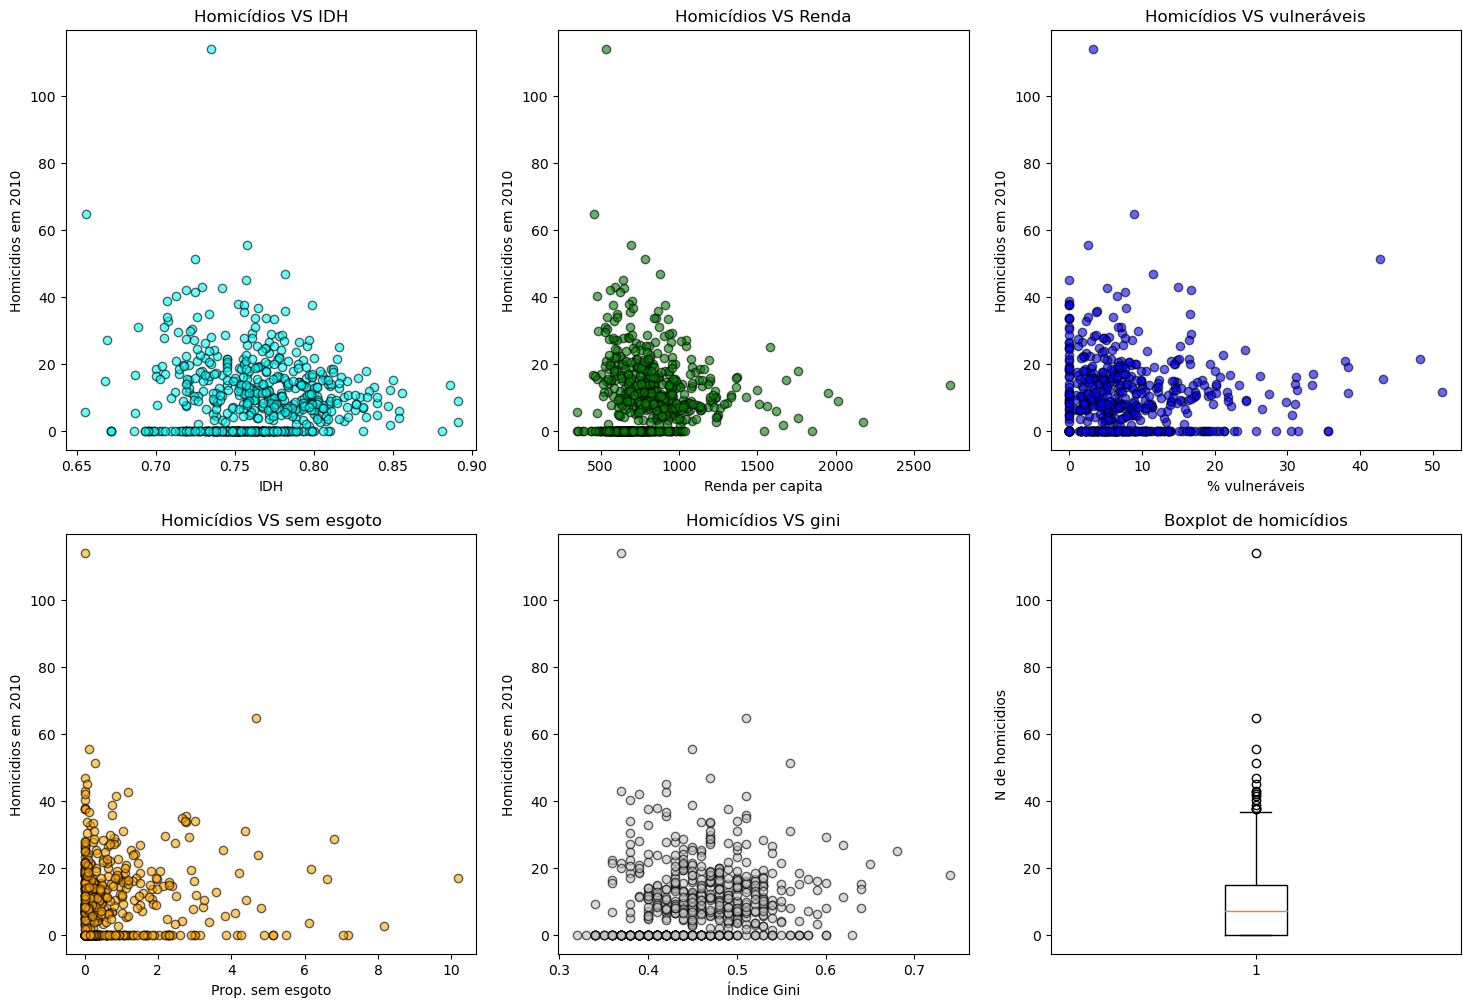

In [312]:
plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
plt.scatter(df_teste['idhm'], df_teste['Taxa_Hom_porM'].astype(float), alpha=0.6, color='cyan', edgecolors="black")
plt.xlabel('IDH')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS IDH')
corr_idhm = df_teste['Taxa_Hom_porM'].astype(float).corr(df_teste['idhm'])
if abs(corr_idhm) < 0.3:
    print(f'Correlação entre homicídios e idhm é fraca e possui valor de {corr_idhm}')
elif abs(corr_idhm) >0.3 and (corr_idhm) < 0.7:
    print(f'Correlação entre homicídios e idhm é moderada e possui valor de {corr_idhm}')
elif abs(corr_idhm) > 0.7:
    print(f'Correlação entre homicídios e idhm é forte e possui valor de {corr_idhm}')

plt.subplot(2,3,2)
plt.scatter(df_teste['renda_per_capita'], df_teste['Taxa_Hom_porM'].astype(float), alpha=0.6, color='green', edgecolors="black")
plt.xlabel('Renda per capita')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS Renda')
corr_crianca = df_teste['Taxa_Hom_porM'].astype(float).corr(df_teste['renda_per_capita'])
if abs(corr_crianca) < 0.3:
    print(f'Correlação entre homicídios e renda per capita é fraca e possui valor de {corr_crianca}')
elif abs(corr_crianca) >0.3 and (corr_crianca) < 0.7:
    print(f'Correlação entre homicídios e renda per capita é moderada e possui valor de {corr_crianca}')
elif abs(corr_crianca) > 0.7:
    print(f'Correlação entre homicídios e renda per capita é forte e possui valor de {corr_crianca}')

plt.subplot(2,3,3)
plt.scatter(df_teste['proporcao_vulnerabilidade_socioeconomica'], df_teste['Taxa_Hom_porM'].astype(float), alpha=0.6, color='blue', edgecolors="black")
plt.xlabel('% vulneráveis')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS vulneráveis')
corr_vul = df_teste['Taxa_Hom_porM'].astype(float).corr(df_teste['proporcao_vulnerabilidade_socioeconomica'])
if abs(corr_vul) < 0.3:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é fraca e possui valor de {corr_vul}')
elif abs(corr_vul) >0.3 and (corr_vul) < 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é moderada e possui valor de {corr_vul}')
elif abs(corr_vul) > 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas vulneráveis é forte e possui valor de {corr_vul}')

plt.subplot(2,3,4)
plt.scatter(df_teste['proporcao_sem_agua_esgoto'], df_teste['Taxa_Hom_porM'].astype(float), alpha=0.6, color='Orange', edgecolors="black")
plt.xlabel('Prop. sem esgoto')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS sem esgoto')
corr_esg = df_teste['Taxa_Hom_porM'].astype(float).corr(df_teste['proporcao_sem_agua_esgoto'])
if abs(corr_esg) < 0.3:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é fraca e possui valor de {corr_esg}')
elif abs(corr_esg) >0.3 and (corr_esg) < 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é moderada e possui valor de {corr_esg}')
elif abs(corr_esg) > 0.7:
    print(f'Correlação entre homicídios e prop. de pessoas sem esgoto é forte e possui valor de {corr_esg}')

plt.subplot(2,3,5)
plt.scatter(df_teste['indice_gini'], df_teste['Taxa_Hom_porM'].astype(float), alpha=0.6, color='silver', edgecolors="black")
plt.xlabel('Índice Gini')
plt.ylabel('Homicidios em 2010')
plt.title('Homicídios VS gini')
corr_gini = df_teste['Taxa_Hom_porM'].astype(float).corr(df_teste['indice_gini'])
if abs(corr_gini) < 0.3:
    print(f'Correlação entre homicídios e indice gini é fraca e possui valor de {corr_gini}')
elif abs(corr_gini) >0.3 and (corr_gini) < 0.7:
    print(f'Correlação entre homicídios e indice gini é moderada e possui valor de {corr_gini}')
elif abs(corr_gini) > 0.7:
    print(f'Correlação entre homicídios e indice gini é forte e possui valor de {corr_gini}')

plt.subplot(2,3,6)
plt.boxplot(df_teste['Taxa_Hom_porM'].astype(float))
plt.title('Boxplot de homicídios')
plt.ylabel('N de homicidios')

plt.show()